In [2]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2


### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
dataDir='train2017'
dataType='train'
annFile='annotations/instances_{}.json'.format(dataDir)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

loading annotations into memory...
Done (t=13.19s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, '

In [4]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', getClassName(88, cats))

The class name is teddy bear


Number of images containing all the  classes: 4114


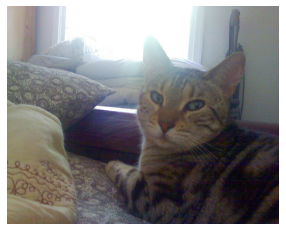

In [5]:
filterClasses = ['cat']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[90])[0]
I = io.imread('{}/{}'.format(dataDir,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

In [6]:
len(imgIds)

4114

In [7]:
imgs = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])

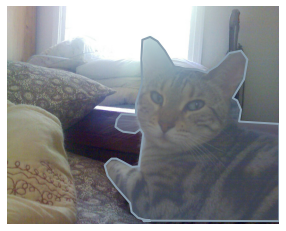

In [8]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

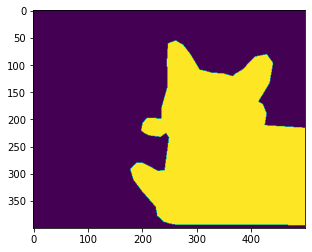

In [11]:
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)

In [ ]:
import cv2
def write_cat(obj_id):
    img = coco.loadImgs(obj_id)[0]
    I = io.imread('{}/{}'.format(dataDir,img['file_name']))/255.0
    
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    mask = np.zeros((img['height'],img['width']))
    for i in range(len(anns)):
        mask = np.maximum(coco.annToMask(anns[i]), mask)
    I = I*255
    I = np.array(I, dtype=np.uint8)
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    cv2.imwrite("cats/{}".format(img['file_name']),I)
    cv2.imwrite("cat_mask/{}".format(img['file_name']),255 - mask*255)

In [ ]:
for id_ in imgIds:
    write_cat(id_)